In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Display basic info
print("Train Data Info:")
print(train_df.info())

print("\nTrain Data Head:")
print(train_df.head())

print("\nTest Data Info:")
print(test_df.info())

print("\nTest Data Head:")
print(test_df.head())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density             

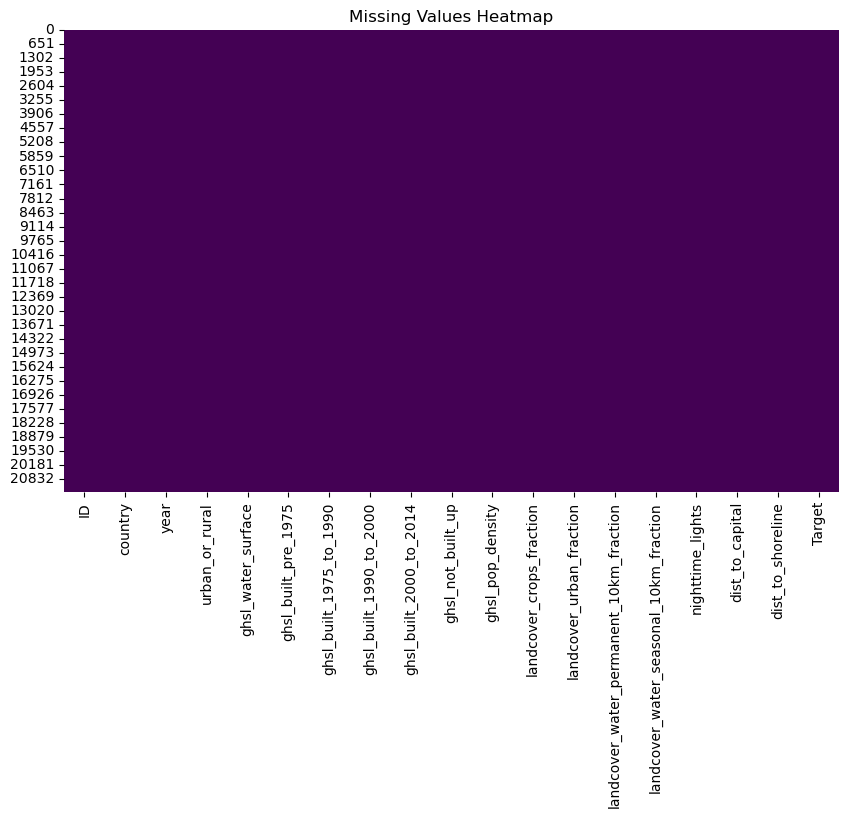

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

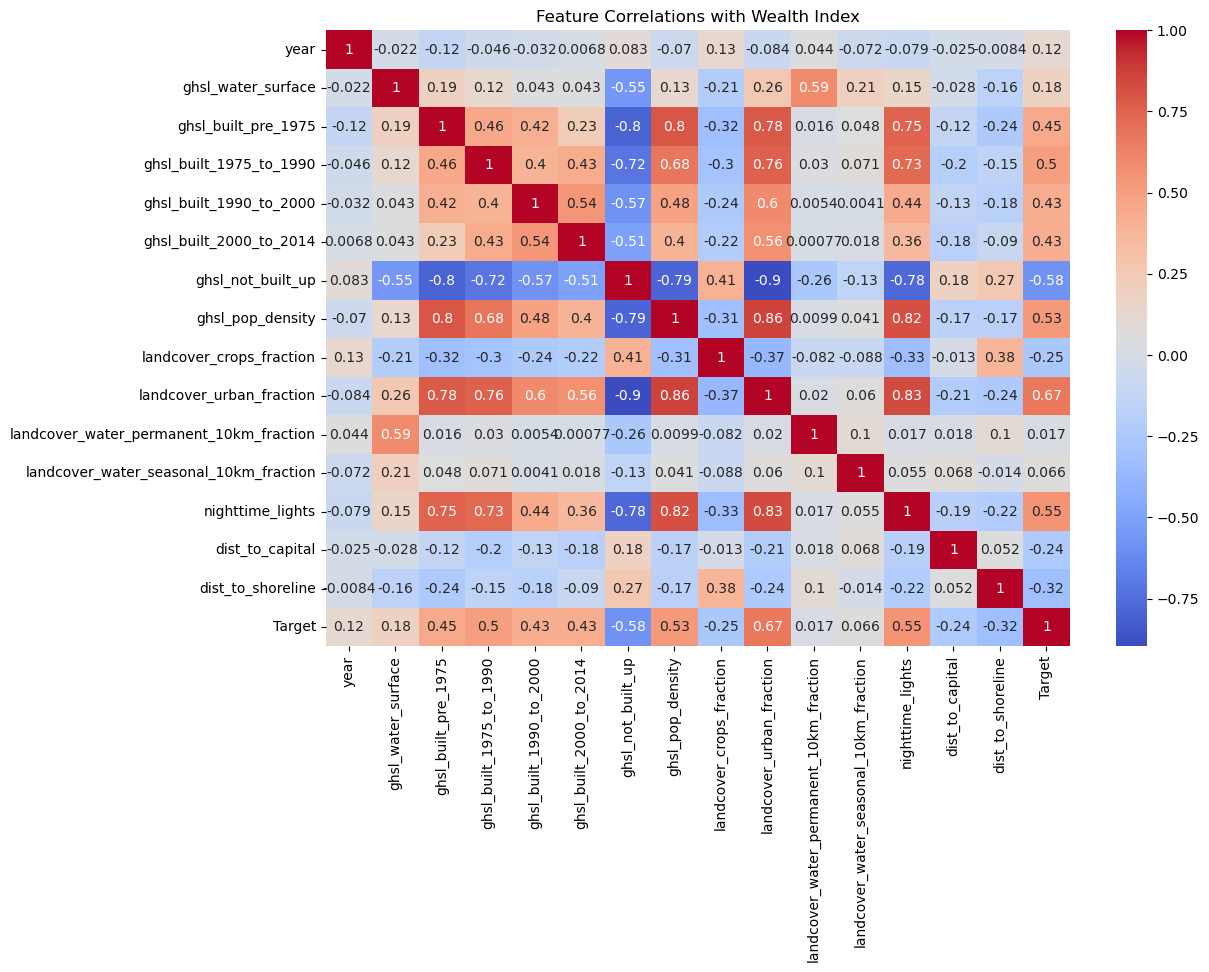

In [5]:
# Select only numeric columns for correlation analysis
numeric_cols = train_df.select_dtypes(include=['number'])  # Excludes categorical columns

# Generate correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations with Wealth Index")
plt.show()

In [6]:
# Count missing values per column
missing_values = train_df.isnull().sum()
print(missing_values)

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

# Select numeric features (excluding the target variable)
features = train_df.drop(columns=["Target", "ID", "country", "urban_or_rural"])  # Drop categorical columns
target = train_df["Target"]

# Normalize numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame for easier analysis
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display summary statistics after scaling
print(features_scaled_df.describe())

               year  ghsl_water_surface  ghsl_built_pre_1975  \
count  2.145400e+04        2.145400e+04         2.145400e+04   
mean  -6.266183e-15       -4.603591e-17        -3.775607e-17   
std    1.000023e+00        1.000023e+00         1.000023e+00   
min   -3.346387e+00       -2.898689e-01        -3.365854e-01   
25%   -4.293965e-01       -2.898689e-01        -3.365854e-01   
50%    1.956729e-01       -2.898689e-01        -3.348461e-01   
75%    8.207422e-01       -2.898689e-01        -2.662557e-01   
max    1.237455e+00        9.659601e+00         7.387268e+00   

       ghsl_built_1975_to_1990  ghsl_built_1990_to_2000  \
count             2.145400e+04             2.145400e+04   
mean              5.299097e-17             2.881384e-17   
std               1.000023e+00             1.000023e+00   
min              -3.702375e-01            -3.875145e-01   
25%              -3.702375e-01            -3.862074e-01   
50%              -3.610708e-01            -3.569468e-01   
75%       

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on validation set
preds = model.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, preds))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 0.0992


In [9]:
# Prepare the test data (exclude categorical columns)
test_features = test_df.drop(columns=["ID", "country", "urban_or_rural"])  # Keep only numeric features

# Scale the test features using the same scaler
test_features_scaled = scaler.transform(test_features)

# Make predictions on test data
test_preds = model.predict(test_features_scaled)

# Create submission DataFrame
submission = pd.DataFrame({"ID": test_df["ID"], "Target": test_preds})

# Save submission file
submission.to_csv("SampleSubmission.csv", index=False)

print("Submission file saved successfully!")

Submission file saved successfully!


In [10]:
import joblib

# Save the trained model
joblib.dump(model, "wealth_model.pkl")

# Save the scaler used for normalization
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
